In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
sns.set()

In [3]:
train_df = pd.read_excel('Train_set.xlsx')

In [4]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [5]:
print(train_df.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


## Feature Engineering

In [6]:
# Date, month and year seperated as integer and droping Date of journey

train_df["Date"]=pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day
train_df["Month"]=pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.month

train_df.drop('Date_of_Journey', axis=1, inplace=True)

In [7]:
# Departure Hour and Departure minute seperated as integer and droping Departure time

train_df["Dep_hour"]=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df["Dep_min"]=pd.to_datetime(train_df['Dep_Time']).dt.minute

train_df.drop('Dep_Time', axis=1, inplace=True)

In [8]:
# Arrival Hour and arrival minute seperated as integer and droping Arrival time

train_df["Arrival_hour"]=pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"]=pd.to_datetime(train_df.Arrival_Time).dt.minute

train_df.drop('Arrival_Time', axis=1, inplace=True)

In [9]:
# Travel Duration is 5 minutes

train_df[train_df['Duration']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,16,50,16,55


In [10]:
# Dropping rows where Duration is 5 minutes

train_df.drop(6474, axis=0, inplace=True)
train_df.drop(2660, axis=0, inplace=True)

In [11]:
duration =  list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [12]:
train_df['Duration_hours'] = duration_hours
train_df['Duration_min'] = duration_minutes
train_df.drop('Duration', axis=1, inplace=True)

## Categorical Data

##### Nominal Data - OneHotEncoder is used
##### Ordinal Data - LabelEncoder is used

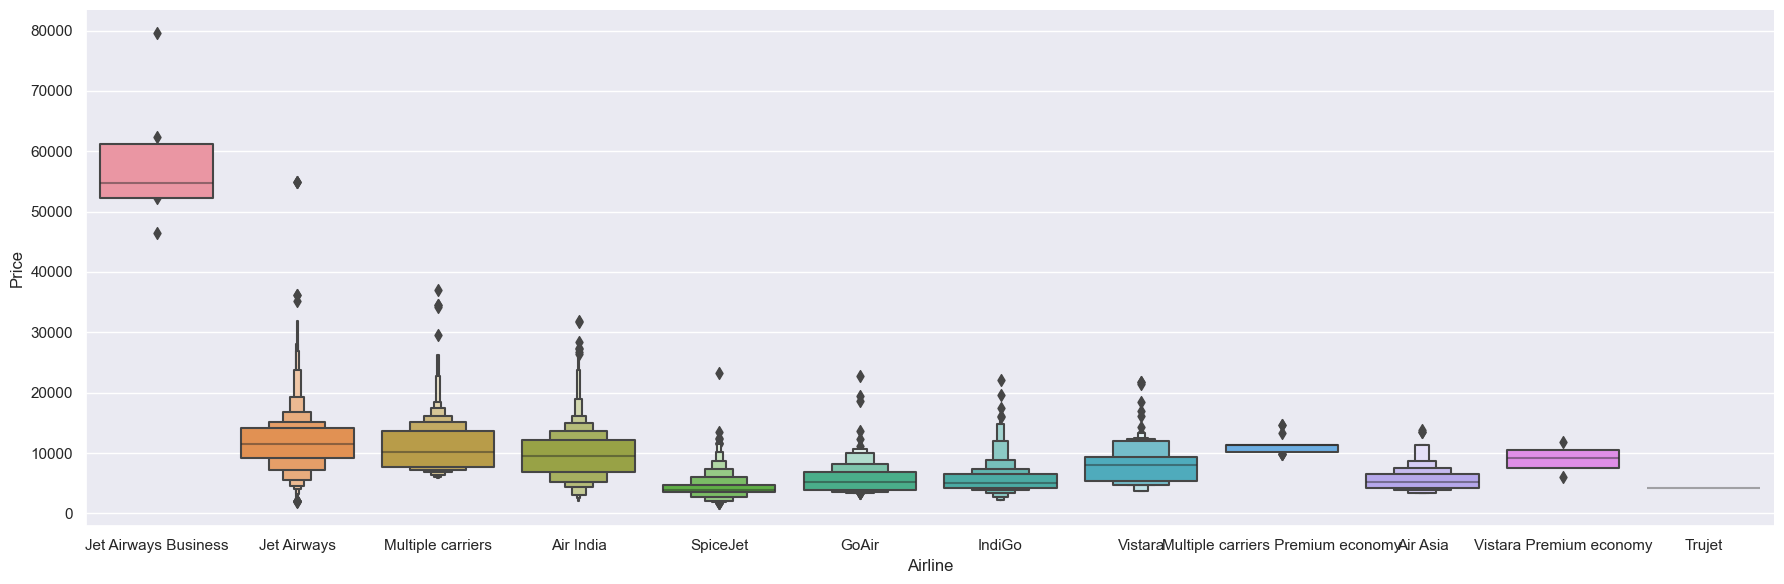

In [13]:
sns.catplot(y='Price', x='Airline', data= train_df.sort_values('Price', ascending=False), kind='boxen', height= 6, aspect= 3)
plt.show()

In [14]:
# As Airline is Nominal data, OneHotEncoding is used

Airline = train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


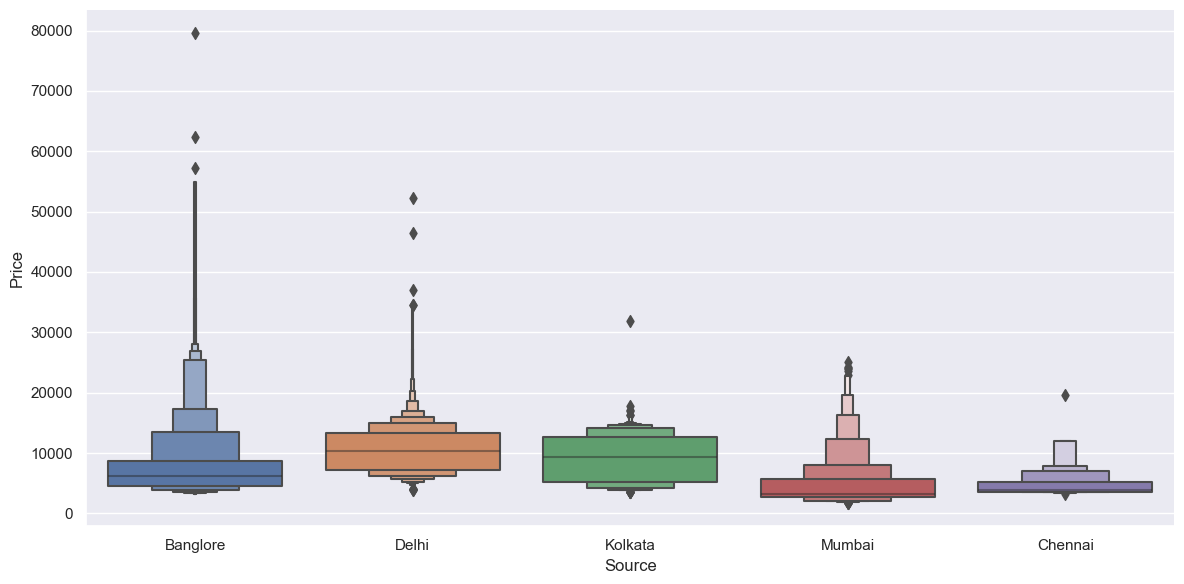

In [15]:
sns.catplot(y='Price', x='Source', data= train_df.sort_values('Price', ascending=False), kind='boxen', height= 6, aspect= 2)
plt.show()

In [16]:
# As Source is Nominal data, OneHotEncoding is used

Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [17]:
# As Destination is Nominal data, OneHotEncoding is used

Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [18]:
# Additional Info is dropped as 80% contains no information
# Route and Total Stops represent eachother, so one of it will be dropped
train_df.drop(['Additional_Info', 'Route'], axis = 1, inplace=True)

In [19]:
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [20]:
train_data = pd.concat([train_df, Airline, Source, Destination], axis=1)
train_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [21]:
train_data.shape

(10680, 30)

## Test Dataset

In [22]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [23]:
test_df.isnull().sum()

# Date, month and year seperated as integer and droping Date of journey

test_df["Date"]=pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.day
test_df["Month"]=pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.month

test_df.drop('Date_of_Journey', axis=1, inplace=True)

# Departure Hour and Departure minute seperated as integer and droping Departure time

test_df["Dep_hour"]=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df["Dep_min"]=pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df.drop('Dep_Time', axis=1, inplace=True)

# Arrival Hour and arrival minute seperated as integer and droping Arrival time

test_df["Arrival_hour"]=pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"]=pd.to_datetime(test_df.Arrival_Time).dt.minute

test_df.drop('Arrival_Time', axis=1, inplace=True)

duration =  list(test_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_minutes = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_minutes.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

test_df['Duration_hours'] = duration_hours
test_df['Duration_min'] = duration_minutes
test_df.drop('Duration', axis=1, inplace=True)

# As Airline is Nominal data, OneHotEncoding is used

Airline = test_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

# As Source is Nominal data, OneHotEncoding is used

Source = test_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

# As Destination is Nominal data, OneHotEncoding is used

Destination = test_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

# Additional Info is dropped as 80% contains no information
# Route and Total Stops represent eachother, so one of it will be dropped
test_df.drop(['Additional_Info', 'Route'], axis = 1, inplace=True)

test_df['Total_Stops']=test_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

test_data = pd.concat([test_df, Airline, Source, Destination], axis=1)
test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [24]:
test_data.head()

,Total_Stops,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [25]:
train_data.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [28]:
# Adding all columns except price as independent variables

x = train_data.loc[:, ['Total_Stops', 'Date', 'Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# Adding price as dependent variables

y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

C:\Users\axayp\AppData\Local\Temp\ipykernel_14756\460451521.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")


<Axes: >

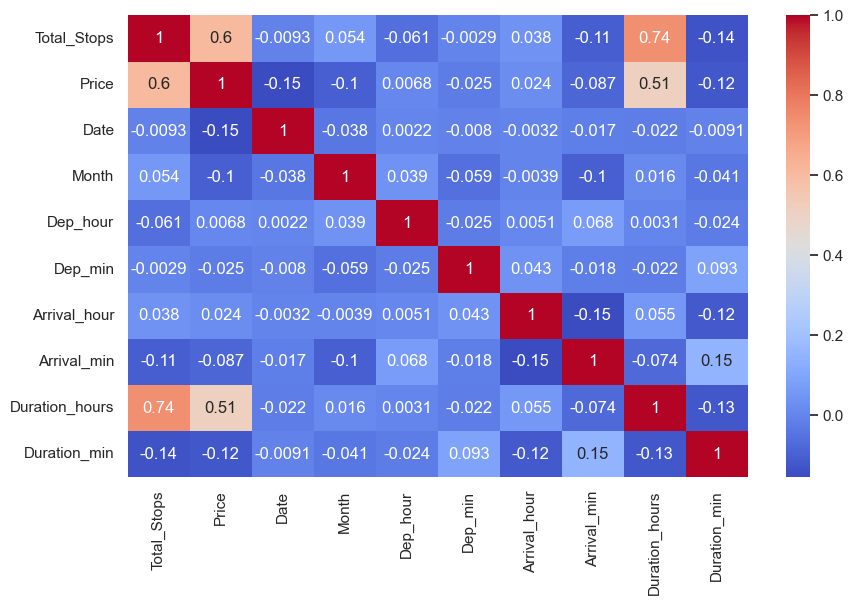

In [49]:
# Correlation between independent and dependent variables

plt.figure(figsize= (10,6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")

In [53]:
selection  = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

<Axes: >

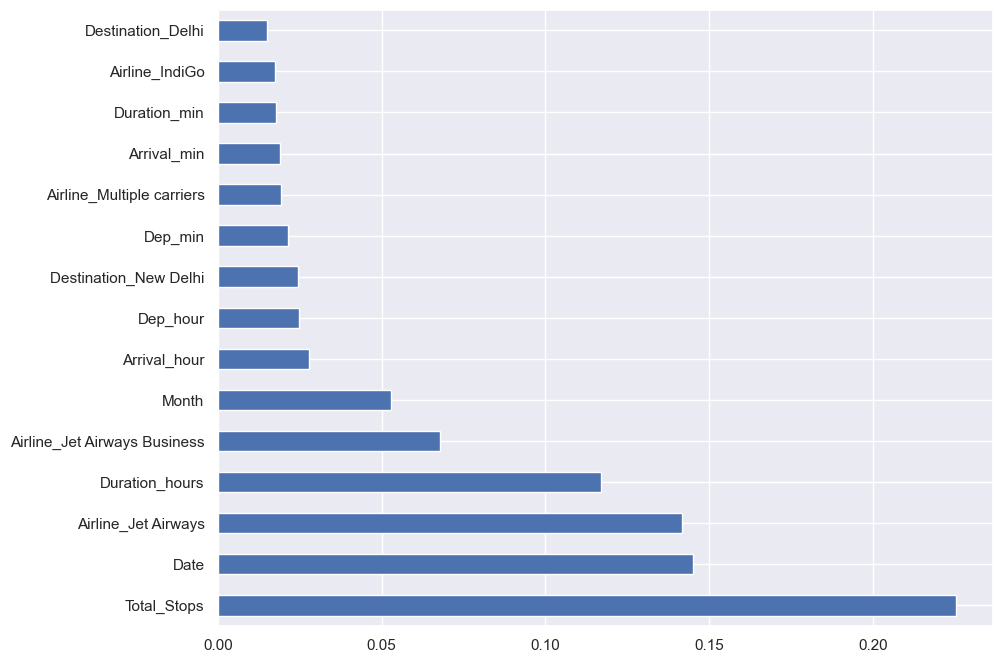

In [60]:
# Plotting top 15 largest attributes' importance

plt.figure(figsize=(10,8))
attr_importance = pd.Series(selection.feature_importances_, index=x.columns)
attr_importance.nlargest(15).plot(kind='barh')

## Using Random Forest fit

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

In [64]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [65]:
y_pred = rfr.predict(x_test)

In [67]:
rfr.score(x_train, y_train)

0.955850954771994

In [68]:
rfr.score(x_test, y_test)

0.8048024444992478

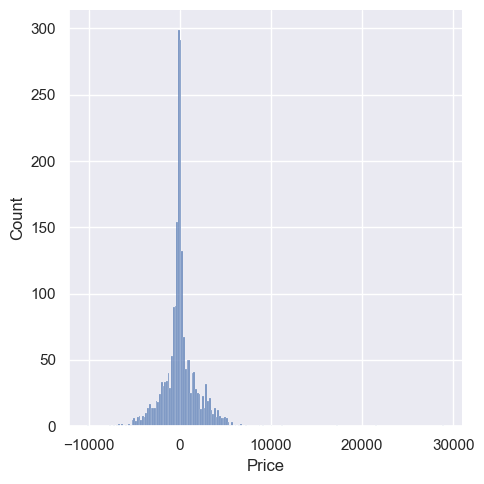

In [69]:
sns.displot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

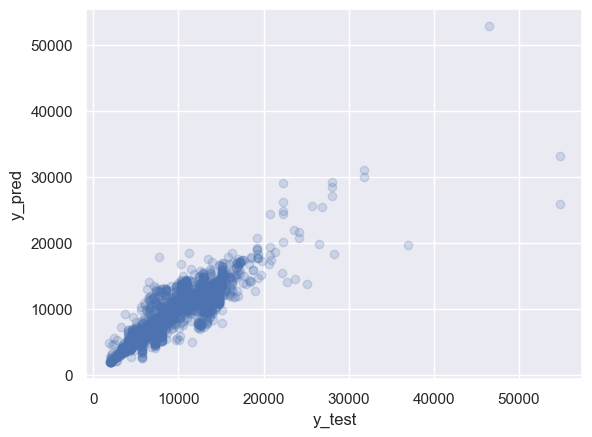

In [75]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [77]:
from sklearn import metrics

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1227.3393709505096
MSE: 4197520.781268217
RMSE: 2048.7851964684382


In [79]:
metrics.r2_score(y_test, y_pred)

0.8048024444992478

## Hyperparameter Tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
# Number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features
max_features = ['sqrt']

# Maximum levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Minimum samples to spilt a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum samples at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [99]:
# Creating random grid

random_grid = { 'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

In [100]:
rf_random = RandomizedSearchCV(estimator= rfr, param_distributions= random_grid, scoring= 'neg_mean_squared_error', n_iter= 10, cv= 5, verbose= 2, random_state= 42, n_jobs= 1)

In [101]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   6.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   6.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   6.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   6.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   6.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [130]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [131]:
prediction = rf_random.predict(x_test)

<Figure size 600x600 with 0 Axes>

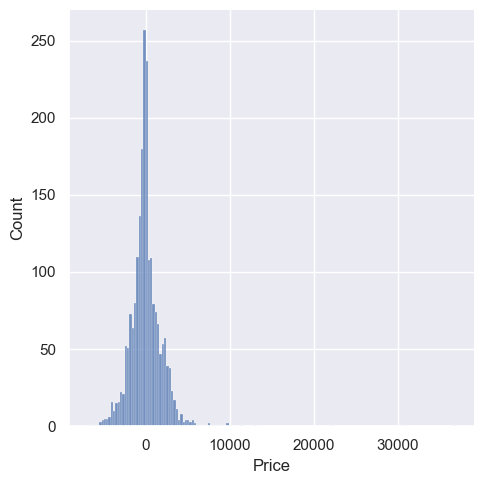

In [132]:
plt.figure(figsize= (6,6))
sns.displot(y_test-prediction)

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1318.8246054368751
MSE: 4668047.32356539
RMSE: 2160.566435813856


## Saving model for reuse

In [134]:
import pickle

file = open('flight.pkl', 'wb')

pickle.dump(rf_random, file)

In [135]:
model = open('flight.pkl', 'rb')
forest = pickle.load(model)

In [136]:
y_prediction = forest.predict(x_test)

In [137]:
metrics.r2_score(y_test, y_prediction)

0.7829215210587973